In [30]:
import tensorflow as tf
import pathlib
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
import os

In [31]:
batch_size = 32
img_height = 64
img_width = 64

In [32]:
train_dir = 'F:/Project/dataset/training_set'
test_dir = 'F:/Project/dataset/test_set'

In [33]:
#importing mass train images 
train_ds = tf.keras.utils.image_dataset_from_directory(
  train_dir,
  validation_split=None,
  subset=None,
  color_mode="grayscale",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 3000 files belonging to 2 classes.


In [34]:
#importing mass test images
test_ds = tf.keras.utils.image_dataset_from_directory(
  test_dir,
  validation_split=None,
  subset=None,
  color_mode="grayscale",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 253 files belonging to 2 classes.


In [35]:
class_names = train_ds.class_names
print(class_names)

['no', 'yes']


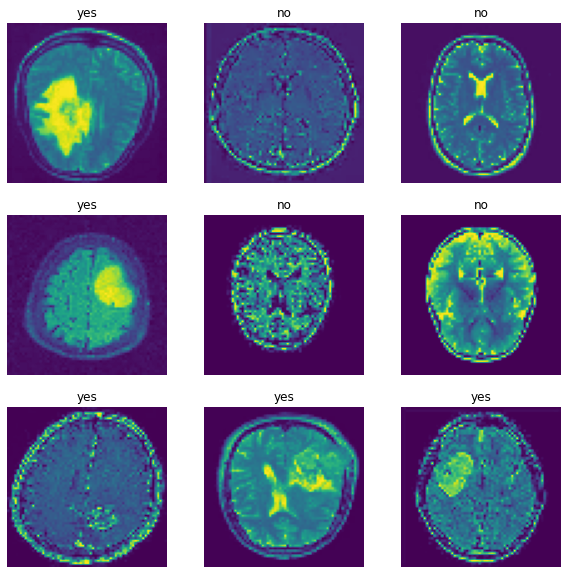

In [36]:
#Visualizing the data
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


In [37]:
#Data Augmentation
data_augmentation = keras.Sequential(
    [layers.RandomFlip("horizontal"), layers.RandomRotation(0.1),]
)

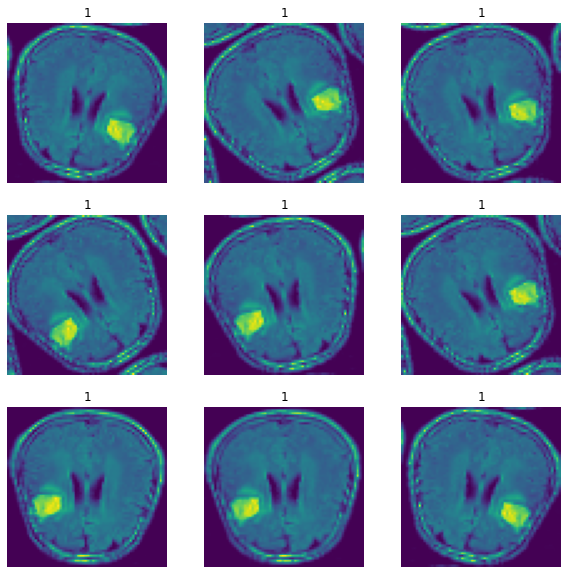

In [38]:
#Visualizing the augmented data
import numpy as np

for images, labels in train_ds.take(1):
    plt.figure(figsize=(10, 10))
    first_image = images[0]
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        augmented_image = data_augmentation(
            tf.expand_dims(first_image, 0), training=True
        )
        plt.imshow(augmented_image[0].numpy().astype("int32"))
        plt.title(int(labels[0]))
        plt.axis("off")


In [39]:
#Building Base model

# Initialising the CNN
model = tf.keras.models.Sequential()

#Step 1 - Convolution
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 1]))

# Step 2 - Pooling
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a second convolutional layer
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))


# Step 3 - Flattening
model.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
model.add(tf.keras.layers.Dense(units=128, activation='relu', name="layer1"))

# Step 5 - Output Layer
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid', name="layer2"))


In [40]:
model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 12544)             0         
                                                                 
 layer1 (Dense)              (None, 128)              

In [41]:
# Part 3 - Training the CNN

# Compiling the CNN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Training the CNN on the Training set and evaluating it on the Test set
history = model.fit(x = train_ds, validation_data = test_ds, epochs = 10)

Epoch 1/10


ValueError: in user code:

    File "C:\Users\Sweekar\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\Sweekar\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Sweekar\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\Sweekar\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 859, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\Sweekar\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\Sweekar\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\input_spec.py", line 248, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_6" (type Sequential).
    
    Input 0 of layer "conv2d_6" is incompatible with the layer: expected axis -1 of input shape to have value 3, but received input with shape (None, 64, 64, 1)
    
    Call arguments received:
      • inputs=tf.Tensor(shape=(None, 64, 64, 1), dtype=float32)
      • training=True
      • mask=None


In [ ]:
model.save('F:/Project/saved_models/cnn_model_new.h5')

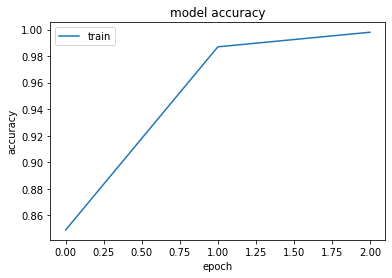

In [ ]:
#plotting accuracy
history.history.keys()

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()